Wine Dataset Shape: (178, 13)

Feature Names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

Target Names: ['class_0' 'class_1' 'class_2']

Class Distribution:
target
1    71
0    59
2    48
Name: count, dtype: int64


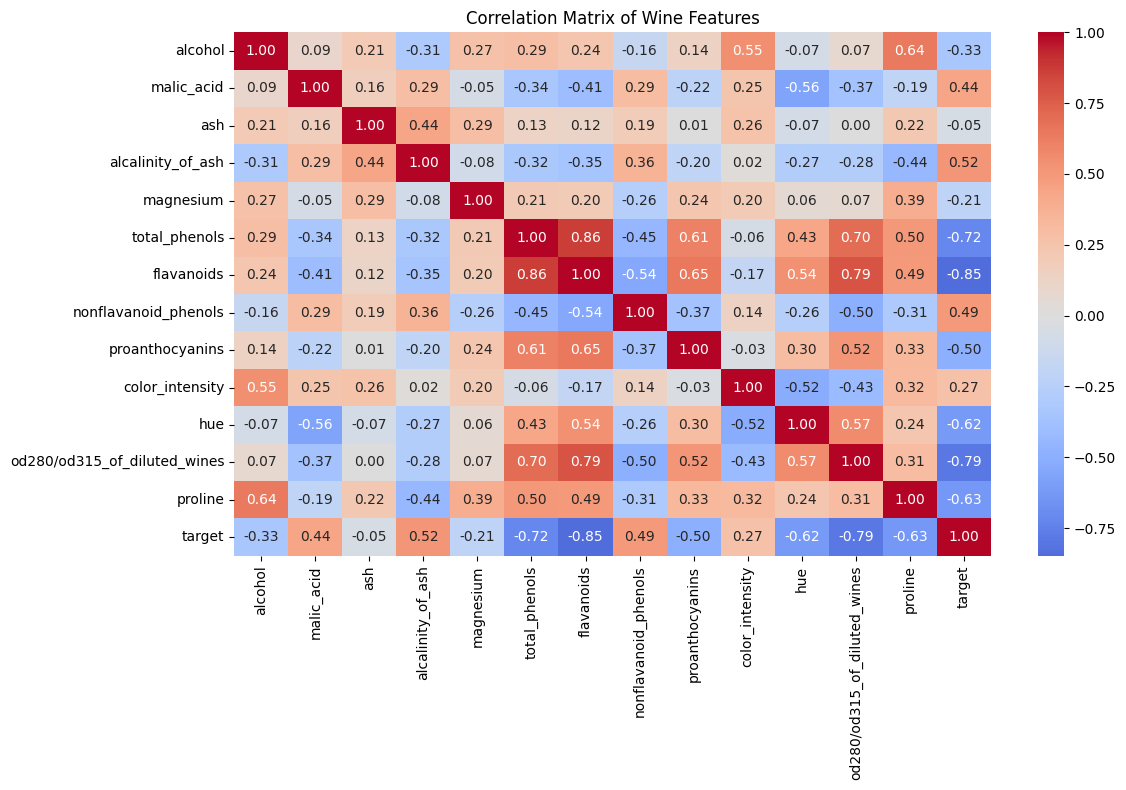

Model Evaluation Results:
Decision Tree:
  Accuracy: 0.9444
  Precision (weighted avg): 0.9514
  Recall (weighted avg): 0.9444
  F1-score (weighted avg): 0.9450

Random Forest:
  Accuracy: 1.0000
  Precision (weighted avg): 1.0000
  Recall (weighted avg): 1.0000
  F1-score (weighted avg): 1.0000

Support Vector Machine:
  Accuracy: 0.9722
  Precision (weighted avg): 0.9741
  Recall (weighted avg): 0.9722
  F1-score (weighted avg): 0.9720

Cross-Validation Results:
Decision Tree:
  CV Accuracy: 0.8654 (+/- 0.0881)
  Individual fold scores: [0.91666667 0.80555556 0.83333333 0.91428571 0.85714286]

Random Forest:
  CV Accuracy: 0.9721 (+/- 0.0351)
  Individual fold scores: [0.97222222 0.94444444 0.97222222 0.97142857 1.        ]

Support Vector Machine:
  CV Accuracy: 0.9833 (+/- 0.0444)
  Individual fold scores: [1.         0.97222222 0.94444444 1.         1.        ]

Hyperparameter Tuning for Random Forest:
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split'

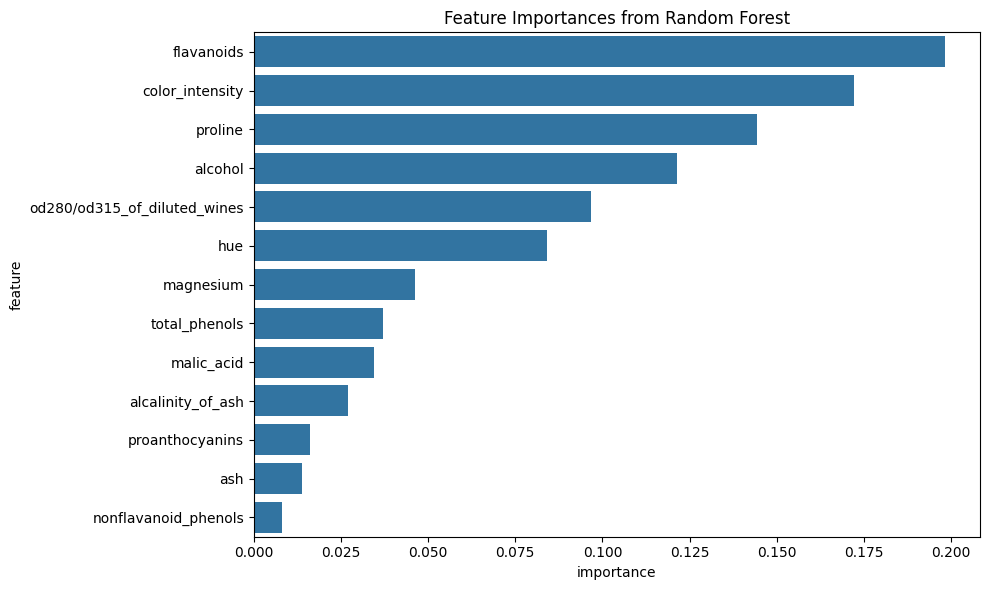

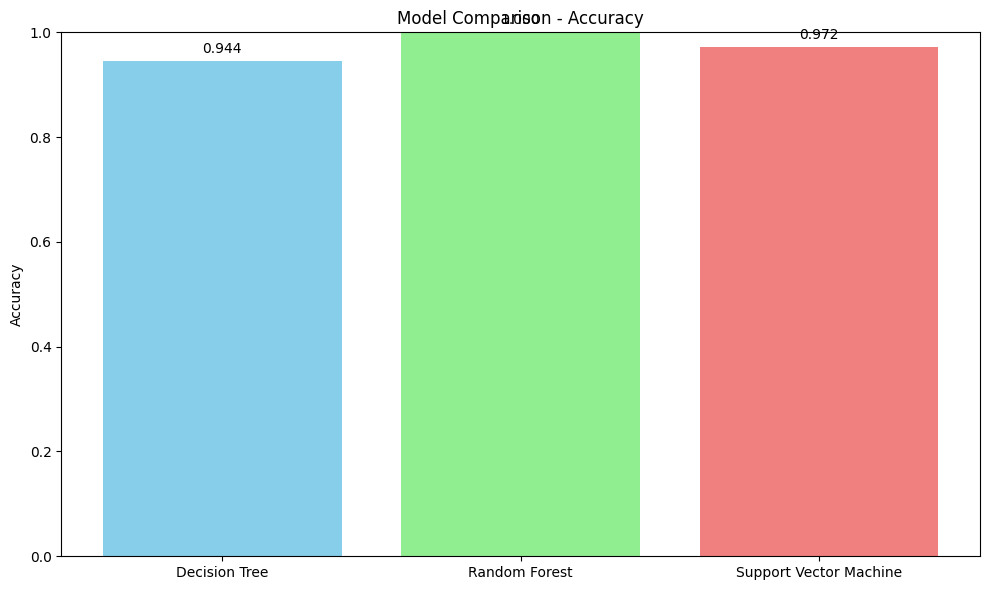

Final Conclusions:
Best performing model: Random Forest with accuracy 1.0000


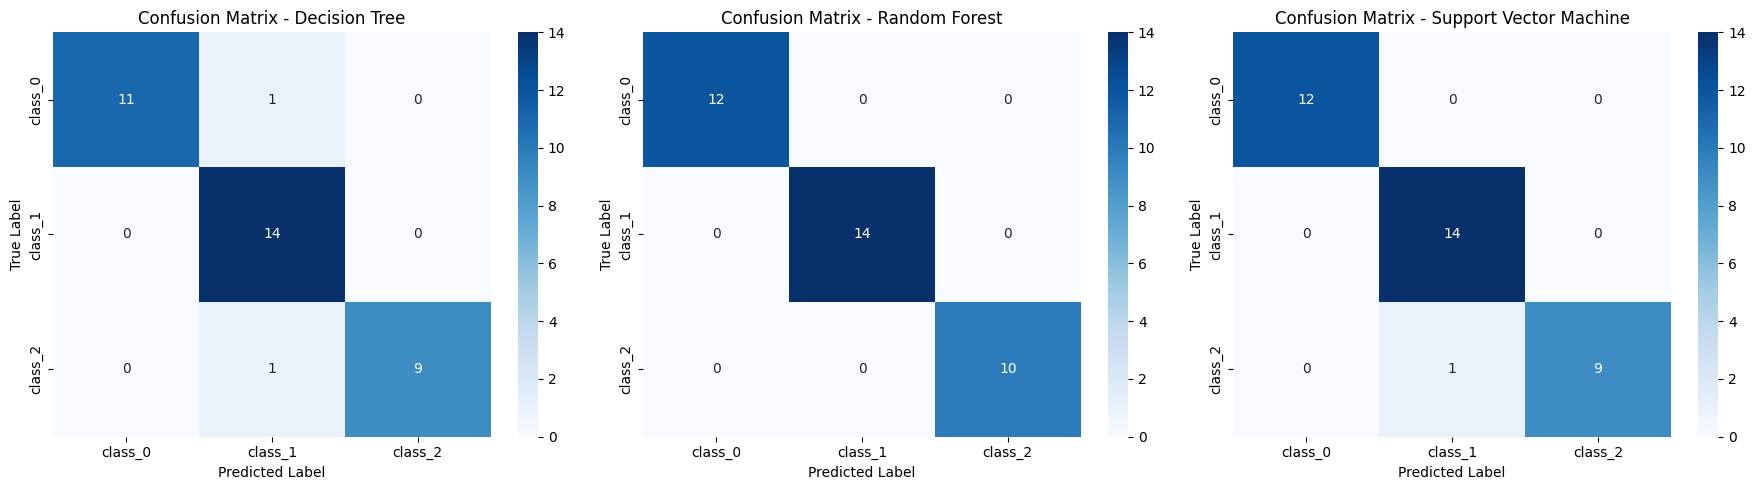

In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_wine

# Load the wine dataset
wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names
target_names = wine.target_names

# Create a DataFrame for better visualization (without string columns for correlation)
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

# Display basic information about the dataset
print("Wine Dataset Shape:", X.shape)
print("\nFeature Names:", feature_names)
print("\nTarget Names:", target_names)
print("\nClass Distribution:")
print(df['target'].value_counts())

# Exploratory Data Analysis - use only numeric columns for correlation
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Wine Features')
plt.tight_layout()
plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
svm_model = SVC(random_state=42)

# Train and evaluate each model
models = {
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'Support Vector Machine': svm_model
}

# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Generate classification report
    report = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    return accuracy, report, cm

# Evaluate each model
results = {}
for name, model in models.items():
    if name == 'Support Vector Machine':
        # Use scaled data for SVM
        accuracy, report, cm = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)
    else:
        accuracy, report, cm = evaluate_model(model, X_train, X_test, y_train, y_test)

    results[name] = {
        'accuracy': accuracy,
        'report': report,
        'confusion_matrix': cm
    }

# Display results
print("Model Evaluation Results:")
print("=" * 50)
for name, result in results.items():
    print(f"{name}:")
    print(f"  Accuracy: {result['accuracy']:.4f}")
    print(f"  Precision (weighted avg): {result['report']['weighted avg']['precision']:.4f}")
    print(f"  Recall (weighted avg): {result['report']['weighted avg']['recall']:.4f}")
    print(f"  F1-score (weighted avg): {result['report']['weighted avg']['f1-score']:.4f}")
    print()

# Cross-validation for each model
print("Cross-Validation Results:")
print("=" * 50)
cv_results = {}
for name, model in models.items():
    if name == 'Support Vector Machine':
        # Use scaled data for SVM
        cv_scores = cross_val_score(model, scaler.fit_transform(X), y, cv=5, scoring='accuracy')
    else:
        cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

    cv_results[name] = cv_scores
    print(f"{name}:")
    print(f"  CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    print(f"  Individual fold scores: {cv_scores}")
    print()

# Hyperparameter tuning for Random Forest (as an example)
print("Hyperparameter Tuning for Random Forest:")
print("=" * 50)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")
print(f"Test set score: {grid_search.score(X_test, y_test):.4f}")

# Feature importance from Random Forest
best_rf = grid_search.best_estimator_
feature_importances = best_rf.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
}).sort_values('importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Feature Importances from Random Forest')
plt.tight_layout()
plt.show()

# Compare model performance
model_names = list(results.keys())
accuracies = [results[name]['accuracy'] for name in model_names]

plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracies, color=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Model Comparison - Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0, 1.0)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print final conclusions
print("Final Conclusions:")
print("=" * 50)
best_model = max(results.items(), key=lambda x: x[1]['accuracy'])
print(f"Best performing model: {best_model[0]} with accuracy {best_model[1]['accuracy']:.4f}")

# Display confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, (name, result) in enumerate(results.items()):
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues',
                xticklabels=target_names, yticklabels=target_names, ax=axes[i])
    axes[i].set_title(f'Confusion Matrix - {name}')
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')

plt.tight_layout()
plt.show()